# Chapter 2: Statistical Learning

### Imports

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy.optimize import minimize

from typing import Callable
import numpy.typing as npt
from collections import namedtuple

rng = np.random.default_rng()

## Equations

### Mean Squared Error
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2
$$
*pg. 28*

In [56]:
def mse(x: npt.ArrayLike, y: npt.ArrayLike, f_hat: Callable[[npt.ArrayLike], float]) -> float:
    '''
    Calculates the Mean Squared Error for a predictor function.
    ## Parameters
    x : array-like 
        An array of observations.
    y : array-like 
        An array of response variables.
    f_hat : callable
        A function that predicts `y_i`, given `x_i`.

    ## Returns
    MSE : float
        A value for the mean squared error of the predictor on the supplied data.
    '''
    n = len(y)

    return 1/n * sum(
        (y[i] - f_hat(x[i]))**2 for i in range(n)
        )

### Bias Variance 
Equation for the decomposed sum for expected test MSE.
$$
E\left(y_0-\hat{f}(x_0)\right)^2 = \text{Var}(\hat{f}(x_0)+[\text{Bias}(\hat{f}(x_0))]^2+\text{Var}(\epsilon)
$$
*pg. 32*

In [57]:
def bias_variance_tradeoff():
    pass
    # TODO: Find equation to approximate the Var(f_hat(x_0))

### Classification Error Rate
$$
\frac{1}{n}\sum_{i=1}^{n}I(y_i\neq\hat{y}_i)
$$
*pg. 35*

In [58]:
def classification_error_rate(y: npt.ArrayLike, y_hat: npt.ArrayLike) -> float:
    '''
    Calculates the Error Rate for an array of predicted labels and true labels.
    ## Parameters
    y : array-like 
        An array of true labels.
    y_hat : array-like 
        An array of predicted labels.

    ## Returns
    error_rate : float
        A value for the error rate, the fraction of incorrect classifications
    '''
    n = len(y)

    # This is purposefully written in a verbose and redundant way to reflect the nature of the indicator variable 'I'
    return 1/n * sum(
        I := (1 if y[i] != y_hat[i] else 0) for i in range(n)
        )

### Bayes Classifier
Assigning class to $x_0$ where probability for $j$ is highest
$$
\text{Pr}(Y=j|X=x_0)
$$

In [59]:
def bayes_classifier(Y, x0, Pr):
    return max(
        [{'j': j, 'prob': Pr(j, x0)} for j in Y],
        key=lambda dict: dict['prob']
    )

### Bayes Error Rate
$$
1-E\left(\max_j\text{Pr}(Y=j|X)\right)
$$

In [60]:
# def E():
#     '''Expected value.
#     From https://statisticsbyjim.com/probability/expected-value'''
#     sum(P(x_i) for i in )

*Individual:* 

$
1 - \max_j \text{Pr}(Y=j|X=x_0)
$

In [61]:
def bayes_error_rate_individual(Y, x0, Pr):
    return 1 - max(
        [{'prob': Pr(j, x0), 'j': j,} for j in Y],
        key=lambda dict: dict['prob']
    )['j'] 

*General:*

In [62]:
# def bayes_error_rate(Y, X, Pr):
#     1 - E(
#         max(
#             lambda j, x0: Pr(j, x0) for j in set(Y)
#         )
#     )

### KNN
$$
\text{Pr}(Y=j|X=x_0)=\frac{1}{K}\sum_{i\in \mathcal{N}_0}I(y_i=j)
$$

## Examples

### Mean Squared Error

Expected 0 MSE

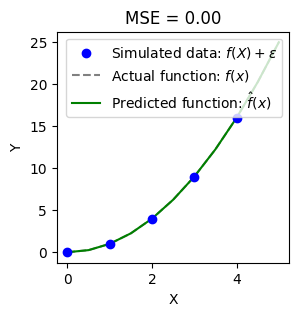

In [63]:
x = np.arange(5)
f = lambda x: x ** 2
y = f(x)

# Perfect estimator 
f_hat = f

plt.figure(figsize=(3,3))

for i, point_x in enumerate(x):
    plt.vlines(point_x, y[i], f_hat(point_x), "k", ":", zorder=0)

plt.scatter(x, y, c='b', label="Simulated data: $f(X) + \epsilon$", zorder=3)

axis = np.linspace(0, 5, 11)
plt.plot(axis, f(axis), '--', c='gray', label="Actual function: $f(x)$", zorder=1)
plt.plot(axis, f_hat(axis), color='green', label="Predicted function: $\hat{f}(x)$", zorder=2)

plt.title(f"MSE = {mse(x, y, f_hat):.2f}")
plt.xlabel("X")
plt.ylabel("Y")

plt.legend();

Expected >0 MSE

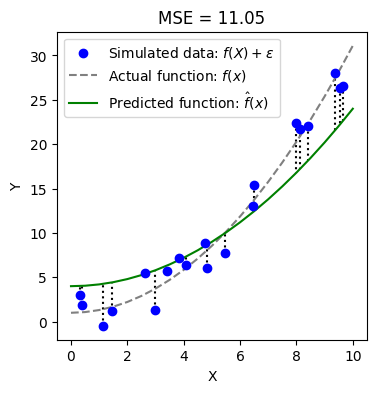

In [64]:
x = rng.random(20) * 10
f = lambda x: 0.3*x**2 + 0.01*x + 1
epsilon = (rng.random(20) - 0.5) * 5

y = f(x) + epsilon

# Approximation of f
f_hat = lambda x: 0.2*x**2 + 4

plt.figure(figsize=(4,4))

for i, point_x in enumerate(x):
    plt.vlines(point_x, y[i], f_hat(point_x), "k", ":", zorder=0)

plt.scatter(x, y, c='b', label="Simulated data: $f(X) + \epsilon$", zorder=3)

axis = np.linspace(0, 10, 21)
plt.plot(axis, f(axis), '--', c='gray', label="Actual function: $f(x)$", zorder=1)
plt.plot(axis, f_hat(axis), color='green', label="Predicted function: $\hat{f}(x)$", zorder=2)

this_mse = mse(x, y, f_hat)

plt.title(f"MSE = {this_mse:.2f}")
plt.xlabel("X")
plt.ylabel("Y")

plt.legend();

Comparison

In [65]:
y_pred = f_hat(x)

sklearn_mse = mean_squared_error(y, y_pred)
numpy_mse = np.square(np.subtract(y,y_pred)).mean() 

print(
f'''this: {this_mse:.2f}
sklearn: {sklearn_mse:.2f}
numpy_mse: {numpy_mse:.2f}''')


this: 11.05
sklearn: 11.05
numpy_mse: 11.05


### Bias Variance tradeoff

### Classification error rate

In [66]:
y = rng.integers(1, 10, 10)

y_hat = y.copy()
# Change only 2 of 10 values (20%)
y_hat[[0, 1]] +=1

print("Y: " + str(y))
print("Y_hat: " + str(y_hat))

cer = classification_error_rate(y, y_hat)
sklearn_cer = 1 - accuracy_score(y, y_hat)

print(
f'''this: {cer:.2f}
sklearn: {sklearn_cer:.2f}''')

Y: [7 6 6 4 6 3 3 1 7 8]
Y_hat: [8 7 6 4 6 3 3 1 7 8]
this: 0.20
sklearn: 0.20


### *Conditional Distribution*

Given a point $P = (p,q)$ and line $y = f(x)$, distance is given by
$$
D = \sqrt{(p-x)^2 + (q-f(x))^2}
$$

In [67]:
def min_dist_point_to_curve(P, f):
    p,q = P
    '''Finds the minimum distance between a point and a curve.
    Returns: a named tuple containing the value for minimum distance and the point on the line that that corresponds to'''
    dist = lambda x: np.sqrt((x - p)**2 + (f(x) - q)**2)

    min_x = minimize(dist, P[0]).x[0]
    min_dist = dist(min_x)
    min_point = (min_x, f(min_x))
    
    Result = namedtuple("Result", ["min_dist", "min_point"])
    return Result(min_dist, min_point)

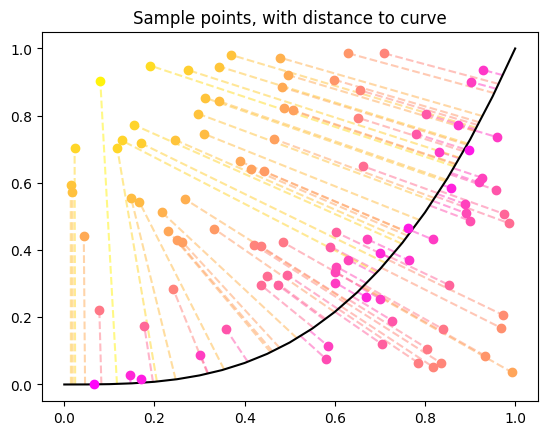

In [68]:
f = lambda x: x**3

x_1 = np.random.uniform(0, 1, 100)
x_2 = np.random.uniform(0, 1, 100)

points = zip(x_1, x_2)
min_distances, min_points = zip(*[min_dist_point_to_curve(P, f) for P in points])

# Using exponential to weight far away points more significantly
# For calculating conditional probability as a function of distance squared.
min_distances_exp = np.power(min_distances, 0.5)

# Distances are already normalized to the range 0-1 for the colormap, 
# as 1 is the largest possible distance, and 0 is the smallest
cmp = colormaps["spring"]

for i, P in enumerate(min_points):
    plt.scatter(x_1[i], x_2[i], color = cmp(min_distances_exp[i]), zorder=2)
    plt.plot([P[0], x_1[i]], [P[1], x_2[i]], color=(cmp(min_distances_exp[i])), linestyle="--", alpha=0.5, zorder=1)

axis = np.linspace(0, 1, 21)
plt.plot(axis, f(axis), "k", zorder=1)
plt.title("Sample points, with distance to curve");

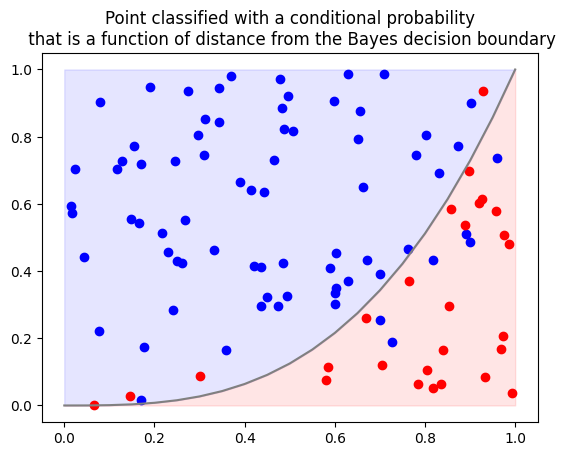

In [69]:
y = np.random.uniform(0, 1, 100)

# Boolean condition array: are the points above the line? (in the blue area)
conds = (x_2 > f(x_1))

for i in range(len(y)):
    # 50/50 chance, buffered by distance. 
    #i.e. points on the dividing line have no buffer (50%), points furthest away have full buffer (150%)
    threshold = 0.5 + (min_distances_exp[i])
    
    y[i] = (y[i] < threshold) if conds[i] else (y[i] > threshold)

y_mask = y.astype(bool)

plt.scatter(x_1[y_mask], x_2[y_mask], color="b", zorder=1)
plt.scatter(x_1[~y_mask], x_2[~y_mask], color="r", zorder=1)
axis = np.linspace(0, 1, 21)
plt.plot(axis, f(axis), "gray", zorder=2)
plt.fill_between(axis, f(axis), color='r', alpha=0.1, zorder=0)
plt.fill_between(axis, 1, f(axis), color='b', alpha=0.1, zorder=0)

plt.title("Point classified with a conditional probability\n that is a function of distance from the Bayes decision boundary");

### Bayes Classifier

*In this case, the probability is given by `50%` + the square root of the value of minimum distance from the sample to the Bayes decision boundary*
$$
Pr(Y = j | X = x_0) = 50\% + \sqrt{\min({D})}
$$
where $min(D)$ is the distance between a sample $P$ and a the closest point on $f(x)$, shown above

In [70]:
Y = ['blue', 'red']

def Pr(j, x0):
    prob = np.clip(min_dist_point_to_curve(x0, f).min_dist + 0.5, 0, 1)
    # Boolean condition: is the point above the line (blue area)
    above = x0[1] > f(x0[0])
    if j == "blue":
        return prob if above else (1 - prob)
    elif j =="red":
        return prob if not above else (1 - prob)

Bayes classifier:
1: {'j': 'blue', 'prob': 0.9537027914805123}
2: {'j': 'red', 'prob': 0.536307774570311}
3: {'j': 'red', 'prob': 0.7388717573900445}
4: {'j': 'blue', 'prob': 0.8029298561755822}


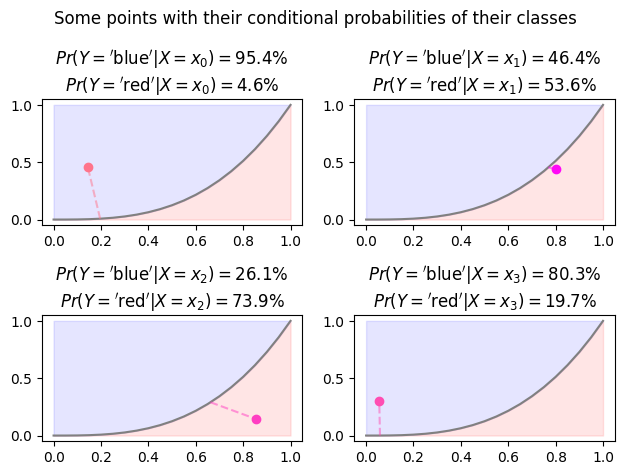

In [79]:
axis = np.linspace(0, 1, 21)

fig, axs = plt.subplots(2,2)

print("Bayes classifier:")
for i, ax in enumerate(axs.flatten()):
    p = rng.random()
    q = rng.random()
    x_i = (p, q)

    print(f"{i+1}: {bayes_classifier(Y, x_i, Pr)}")

    prob_blue = Pr('blue', x_i)
    prob_red = Pr('red', x_i)
    result = min_dist_point_to_curve(x_i, f = lambda x: x**3)
    
    ax.plot(axis, f(axis), "gray", zorder=1)
    ax.fill_between(axis, f(axis), color='r', alpha=0.1, zorder=0)
    ax.fill_between(axis, 1, f(axis), color='b', alpha=0.1, zorder=0)

    ax.scatter(*x_i, color = cmp(result.min_dist), zorder=2)
    ax.plot([result.min_point[0], x_i[0]], [result.min_point[1], x_i[1]], color=(cmp(result.min_dist)), linestyle="--", alpha=0.5, zorder=2)
    ax.set_title(r"$Pr(Y=\mathrm{'blue'}|X=x_" + str(i) + ") =$" + f"{prob_blue:.1%}\n" + r"$Pr(Y=\mathrm{'red'}|X=x_" + str(i) + ") =$" + f"{prob_red:.1%}")

fig.suptitle("Some points with their conditional probabilities of their classes")
plt.tight_layout()

### Bayes Error Rate

### KNN